# Best Neighborhood

We will be measuring the best neighborhood for economic opportunity based on three metrics: Income, Employment, and Safety. 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Income

When considering the "best" neighborhood in Pittsburgh, it is important to consider the income of each neighborhood. Higher-income neighborhoods tend to be safer, offer more community resources, and provide better educational or economic opportunities. While a neighborhood's income does not perfectly describe it, it is not incorrect to assume that higher-income neighborhoods would probably provide a generally higher quality of life for the reasons previously mentioned.

The dataset being used is the Aggregate Household Income in the Past 12 Months set on WPRDC. It provides the median annual income and margin of error for nearly every neighborhood in Pittsburgh.

In [32]:
income_by_neighborhood = pd.read_csv("income_by_neighborhood.csv")

The dataset is not perfect. 

The first problem is that the column names are long and unintuitive. They should be renamed to be simpler and more self-explanatory. 

In [33]:
income_by_neighborhood.columns = ['_id', 'Neighborhood', 'Id', 'Estimated Annual Income', 'Margin of Error']`

Next, not all rows contain data for estimated annual income. It is best to drop these rows from the dataframe, as we have no information about the income in these neighborhoods.

In [37]:
blank_income_mask = income_by_neighborhood['Estimated Annual Income'] != '-'

income_by_neighborhood = income_by_neighborhood[blank_income_mask]

Although all remaining rows contain data for the annual income of the neighborhoods, this data is being stored in the form of strings. To perform any mathematical operations on the data it must be converted into an integer.

In [ ]:
income_by_neighborhood['Estimated Annual Income'] = income_by_neighborhood['Estimated Annual Income'].astype(int)

Finally, it is necessary to divide each of the datapoints by 100 as the decimal point is incorrectly positioned. 

In [ ]:
income_by_neighborhood['Estimated Annual Income'] /= 100

Before drawing any conclusions from the data, it is good to examine it more closely. 

In [34]:
median_median_income = income_by_neighborhood['Estimated Annual Income'].median()
average_median_income = income_by_neighborhood['Estimated Annual Income'].mean()
median_income_deviation = income_by_neighborhood['Estimated Annual Income'].std()

print(f'Median Median Income: ${median_median_income:.2f}')
print(f'Average Median Income: ${average_median_income:.2f}')
print(f'Standard Deviatio of Median Income: ${median_income_deviation:.2f}')

Median Median Income: $491870.00
Average Median Income: $911967.18
Standard Deviatio of Median Income: $1211565.74


The average median income is nearly double the median median income. This implies the existence of outliers in the dataset. A histogram can be created to view the distribution of the median incomes.

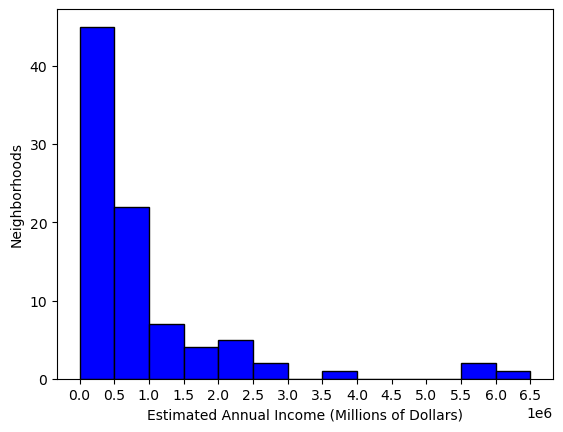

In [35]:
bins = range(0, 6500001, 500000)
plt.hist(income_by_neighborhood['Estimated Annual Income'], bins=bins, color="blue", edgecolor="black")

plt.xticks(bins)

plt.xlabel("Estimated Annual Income (Millions of Dollars)")
plt.ylabel("Neighborhoods")

plt.show()

From the histogram it is clear that the data is heavily skewed right. This is indicative of large income disparity between the average Pittsburgh neighborhood and the highest-earning neighborhoods.

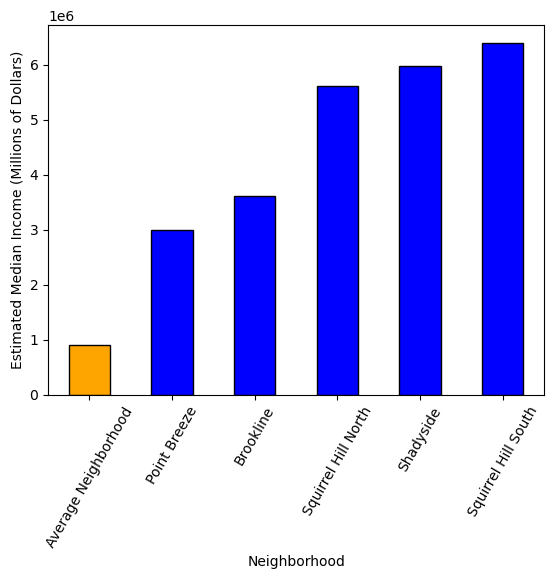

In [36]:
income_by_neighborhood = income_by_neighborhood.sort_values(by="Estimated Annual Income")

average_neighborhood = pd.DataFrame(data={'_id': [-1], 'Neighborhood': ['Average Neighborhood'], 'Id': [-1], 'Estimated Annual Income': [average_median_income], 'Margin of Error': [0]})

top_neighborhoods = pd.concat([average_neighborhood, income_by_neighborhood.tail(5)])

top_neighborhoods.plot(x='Neighborhood', y='Estimated Annual Income', kind='bar', color=['orange', 'blue', 'blue', 'blue', 'blue', 'blue'], edgecolor="black", legend=None)

plt.xticks(rotation=60)

plt.ylabel("Estimated Median Income (Millions of Dollars)")

plt.show()

From this bar graph it is clear that Squirrel Hill South has the greatest median annual income, with over six times the median annual income of the average median income. Shadyside and Squirrel Hill North were close second and third, respectively; however, the difference between Squirrel Hill South, first place, and Squirrel Hill North, third place, is only about $500,000 whereas the difference between Squirrel Hill North, third place, and Brookline, fourth place, is double that at about $1,000,000.

Based solely on median annual income, Squirrel Hill South is the best in Pittsburgh, however when taking into account other factors a case could be made for any of the other highly-ranked neighborhoods: Shadyside, Squirrel Hill North, Brookline and Point Breeze.

# Crime

In [16]:
crime_data = pd.read_csv('Monthly_Criminal_Activity_2025.csv', low_memory=False)

crime_data.head()

,_id,Report_Number,ReportedDate,ReportedTime,Hour,DayofWeek,ReportedMonth,NIBRS_Coded_Offense,NIBRS_Offense_Code,NIBRS_Offense_Category,NIBRS_Offense_Type,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,XCOORD,YCOORD,Zone,Tract,Neighborhood,Block_Address
0,1,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,18 2718 A1 Strangulation Basic - Applying,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
1,2,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13C INTIMIDATION,13C,Assault Offenses,Intimidation,Person,A,18 2706 A1 Terroristic Threats-General,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
2,3,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,90Z ALL OTHER OFFENSES,90Z,All other Offenses,All other Offenses,Group B,B,75 3733 A Fleeing or Attempting To Elude Polic...,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
3,4,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,23H ALL OTHER LARCENY,23H,Larceny/Theft Offenses,All Other Larceny,Property,A,18 3921 A Theft by Unlawful Taking-Movable – L...,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
4,5,PGHP24000017,2024-01-01,00:21,0,Monday,Jan,9999 Vehicle Offense (Not NIBRS Reportable),999,Not NIBRS Reportable,Not NIBRS Reportable,Group B,B,LO 6 101 Discharge of Firearms Prohibited,-80.0243,40.4582,Zone 1,2107,Manchester,"1200 Block of COLUMBUS AVE Pittsburgh, PA"


In [17]:
crime_data.columns

Index(['_id', 'Report_Number', 'ReportedDate', 'ReportedTime', 'Hour',
       'DayofWeek', 'ReportedMonth', 'NIBRS_Coded_Offense',
       'NIBRS_Offense_Code', 'NIBRS_Offense_Category', 'NIBRS_Offense_Type',
       'NIBRS_Crime_Against', 'NIBRS_Offense_Grouping', 'Violation', 'XCOORD',
       'YCOORD', 'Zone', 'Tract', 'Neighborhood', 'Block_Address'],
      dtype='object')

In [18]:
crime_by_neighborhood = crime_data['Neighborhood'].value_counts()

crime_by_neighborhood.head(10)

Neighborhood
Central Business District    7218
South Side Flats             4631
Carrick                      2242
Shadyside                    1993
East Allegheny               1917
East Liberty                 1913
Bloomfield                   1498
Knoxville                    1444
Mount Washington             1401
Squirrel Hill South          1352
Name: count, dtype: int64

In [19]:
crime_by_neighborhood.tail(10)

Neighborhood
Regent Square     97
Oakwood           88
Summer Hill       83
Esplen            79
East Carnegie     78
Swisshelm Park    66
New Homestead     54
Chartiers         38
Ridgemont         33
Saint Clair       25
Name: count, dtype: int64

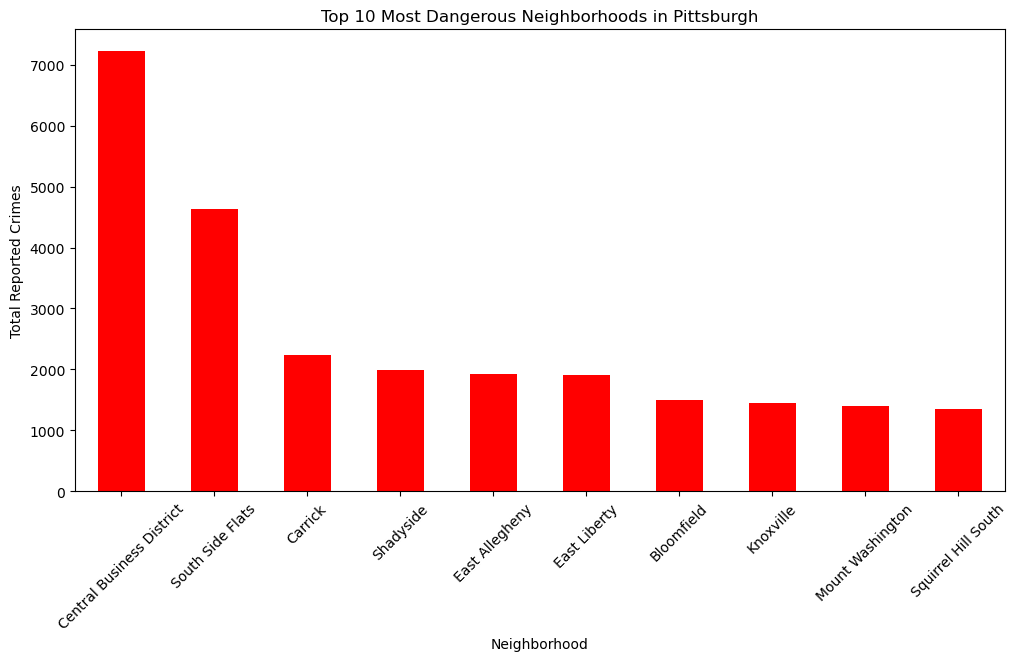

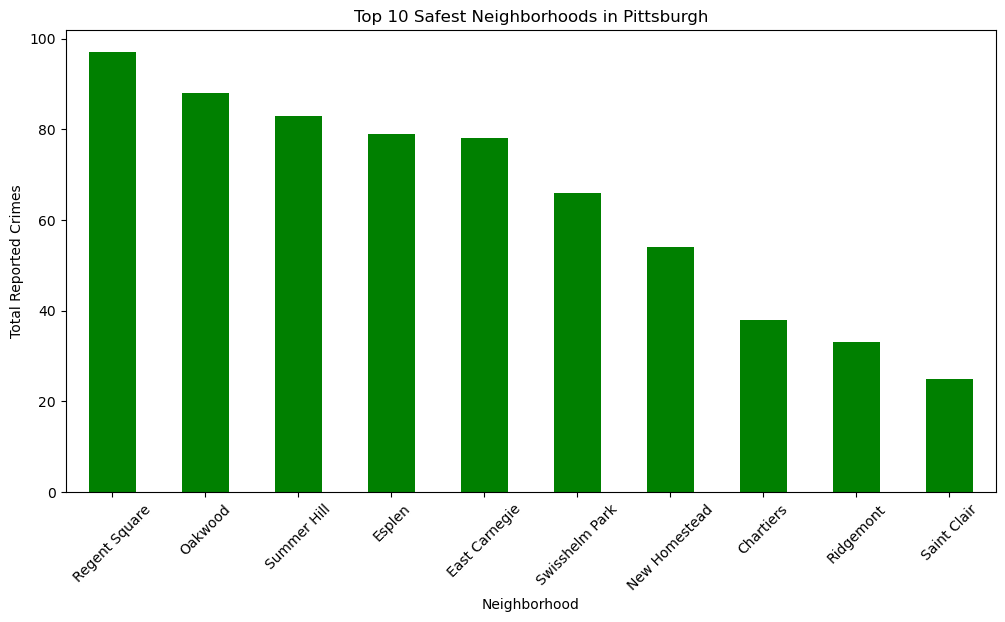

In [20]:
plt.figure(figsize=(12,6))
crime_by_neighborhood.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Most Dangerous Neighborhoods in Pittsburgh')
plt.ylabel('Total Reported Crimes')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
crime_by_neighborhood.tail(10).plot(kind='bar', color='green')
plt.title('Top 10 Safest Neighborhoods in Pittsburgh')
plt.ylabel('Total Reported Crimes')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)
plt.show()

_id                       547
Report_Number             547
ReportedDate              547
ReportedTime              547
Hour                      547
DayofWeek                 547
ReportedMonth             547
NIBRS_Coded_Offense       547
NIBRS_Offense_Code        547
NIBRS_Offense_Category    547
NIBRS_Offense_Type        547
NIBRS_Crime_Against       547
NIBRS_Offense_Grouping    547
Violation                 547
XCOORD                    547
YCOORD                    547
Zone                      547
Tract                     547
Neighborhood              547
Block_Address             541
dtype: int64

## Employment

In [21]:
df = pd.read_csv('employment.csv')
df.head()

,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; In labor force:,Margin of Error; In labor force:,Estimate; In labor force: - Civilian labor force:,Margin of Error; In labor force: - Civilian labor force:,Estimate; In labor force: - Civilian labor force: - Employed,Margin of Error; In labor force: - Civilian labor force: - Empl,Estimate; In labor force: - Civilian labor force: - Unemployed,Margin of Error; In labor force: - Civilian labor force: - Unem,Estimate; In labor force: - Armed Forces,Margin of Error; In labor force: - Armed Forces,Estimate; Not in labor force,Margin of Error; Not in labor force
0,1,Allegheny Center,1,993.0,142.000000,614.0,131.000000,614.0,131.000000,579.0,131.000000,35.0,35.000000,0.0,10.000000,379.0,127.000000
1,2,Allegheny West,2,334.0,103.000000,230.0,79.000000,230.0,79.000000,221.0,80.000000,9.0,22.000000,0.0,10.000000,104.0,51.000000
2,3,Allentown,3,1922.0,343.995640,1085.0,180.540854,1085.0,180.540854,841.0,170.064694,244.0,114.498908,0.0,17.320508,837.0,221.167357
3,4,Arlington,4,1584.0,306.651268,1108.0,235.817726,1108.0,235.817726,991.0,207.465660,117.0,89.157165,0.0,17.320508,476.0,124.342270
4,5,Arlington Heights,5,211.0,106.000000,89.0,56.000000,89.0,56.000000,80.0,57.000000,9.0,14.000000,0.0,10.000000,122.0,99.000000


Preview of data:


,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; In labor force:,Margin of Error; In labor force:,Estimate; In labor force: - Civilian labor force:,Margin of Error; In labor force: - Civilian labor force:,Estimate; In labor force: - Civilian labor force: - Employed,Margin of Error; In labor force: - Civilian labor force: - Empl,Estimate; In labor force: - Civilian labor force: - Unemployed,Margin of Error; In labor force: - Civilian labor force: - Unem,Estimate; In labor force: - Armed Forces,Margin of Error; In labor force: - Armed Forces,Estimate; Not in labor force,Margin of Error; Not in labor force
0,1,Allegheny Center,1,993.0,142.000000,614.0,131.000000,614.0,131.000000,579.0,131.000000,35.0,35.000000,0.0,10.000000,379.0,127.000000
1,2,Allegheny West,2,334.0,103.000000,230.0,79.000000,230.0,79.000000,221.0,80.000000,9.0,22.000000,0.0,10.000000,104.0,51.000000
2,3,Allentown,3,1922.0,343.995640,1085.0,180.540854,1085.0,180.540854,841.0,170.064694,244.0,114.498908,0.0,17.320508,837.0,221.167357
3,4,Arlington,4,1584.0,306.651268,1108.0,235.817726,1108.0,235.817726,991.0,207.465660,117.0,89.157165,0.0,17.320508,476.0,124.342270
4,5,Arlington Heights,5,211.0,106.000000,89.0,56.000000,89.0,56.000000,80.0,57.000000,9.0,14.000000,0.0,10.000000,122.0,99.000000



Average Employment-to-Unemployment Ratio across all neighborhoods: 12.97

Best Neighborhood by Employment-to-Unemployment Ratio:
Neighborhood                  Strip District
Employment_to_Unemployment             117.2
Name: 80, dtype: object


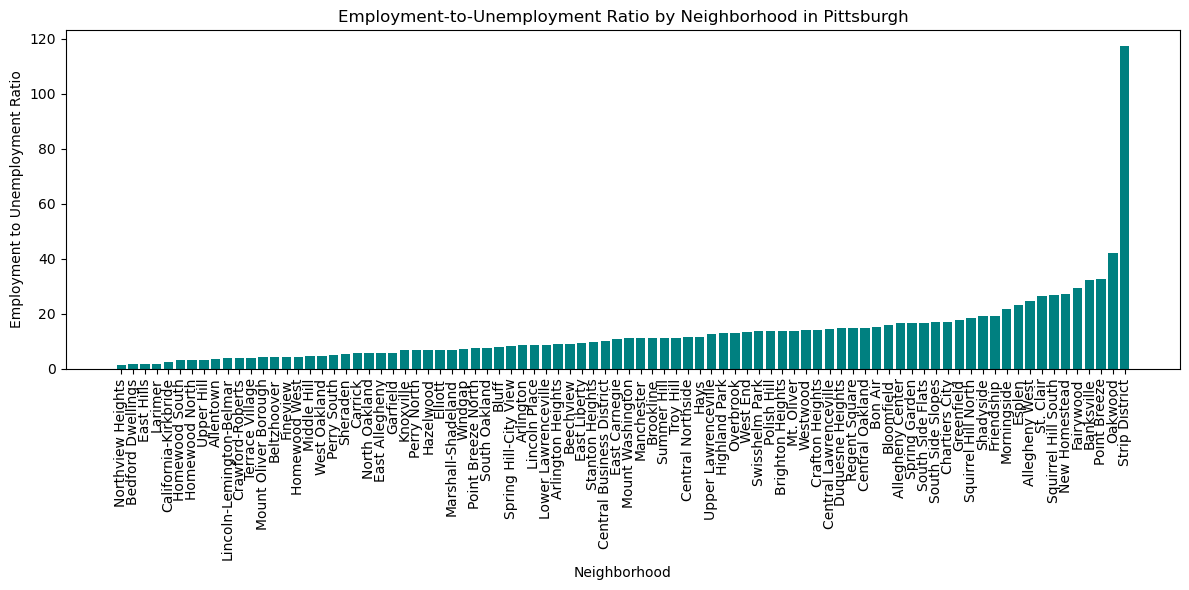

In [38]:
df = pd.read_csv('employment.csv')
print("Preview of data:")
display(df.head())
df = df.dropna(subset=['Estimate; In labor force: - Civilian labor force: - Unemployed'])
df = df[df['Estimate; In labor force: - Civilian labor force: - Unemployed'] != 0]
df['Employment_to_Unemployment'] = (
    df['Estimate; In labor force: - Civilian labor force: - Employed'] /
    df['Estimate; In labor force: - Civilian labor force: - Unemployed']
)
df = df.sort_values(by="Employment_to_Unemployment")
average_ratio = df['Employment_to_Unemployment'].mean()
print(f"\nAverage Employment-to-Unemployment Ratio across all neighborhoods: {average_ratio:.2f}")
best_neighborhood = df.loc[df['Employment_to_Unemployment'].idxmax(), ['Neighborhood', 'Employment_to_Unemployment']]
print("\nBest Neighborhood by Employment-to-Unemployment Ratio:")
print(best_neighborhood)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(df['Neighborhood'], df['Employment_to_Unemployment'], color='teal')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Employment to Unemployment Ratio')
plt.title('Employment-to-Unemployment Ratio by Neighborhood in Pittsburgh')
plt.tight_layout()
plt.show()

,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; In labor force:,Margin of Error; In labor force:,Estimate; In labor force: - Civilian labor force:,Margin of Error; In labor force: - Civilian labor force:,Estimate; In labor force: - Civilian labor force: - Employed,Margin of Error; In labor force: - Civilian labor force: - Empl,Estimate; In labor force: - Civilian labor force: - Unemployed,Margin of Error; In labor force: - Civilian labor force: - Unem,Estimate; In labor force: - Armed Forces,Margin of Error; In labor force: - Armed Forces,Estimate; Not in labor force,Margin of Error; Not in labor force,Employment_to_Unemployment
30,31,Esplen,31,253.0,92.000000,170.0,77.000000,170.0,77.000000,163.0,76.000000,7.0,10.000000,0.0,10.000000,83.0,47.000000,23.285714
1,2,Allegheny West,2,334.0,103.000000,230.0,79.000000,230.0,79.000000,221.0,80.000000,9.0,22.000000,0.0,10.000000,104.0,51.000000,24.555556
78,79,St. Clair,79,206.0,60.000000,110.0,41.000000,110.0,41.000000,106.0,41.000000,4.0,6.000000,0.0,10.000000,96.0,50.000000,26.500000
77,78,Squirrel Hill South,78,13180.0,760.025000,8277.0,629.969841,8262.0,628.775000,7965.0,608.066608,297.0,117.341382,15.0,42.142615,4903.0,506.625108,26.818182
55,56,New Homestead,56,781.0,72.000000,482.0,66.000000,482.0,66.000000,465.0,63.000000,17.0,15.000000,0.0,10.000000,299.0,58.000000,27.352941
31,32,Fairywood,32,1076.0,228.000000,894.0,189.000000,882.0,189.000000,853.0,186.000000,29.0,27.000000,12.0,18.000000,182.0,70.000000,29.413793
5,6,Banksville,6,3753.0,425.187018,2484.0,392.238448,2484.0,392.238448,2409.0,384.053382,75.0,61.351447,0.0,20.000000,1269.0,249.465428,32.120000
63,64,Point Breeze,64,4538.0,314.047767,3325.0,262.950566,3325.0,262.950566,3226.0,258.580742,99.0,48.135226,0.0,26.457513,1213.0,182.898879,32.585859
59,60,Oakwood,60,944.0,115.000000,559.0,109.000000,559.0,109.000000,546.0,107.000000,13.0,13.000000,0.0,10.000000,385.0,73.000000,42.000000
80,81,Strip District,81,658.0,96.000000,591.0,95.000000,591.0,95.000000,586.0,94.000000,5.0,9.000000,0.0,10.000000,67.0,39.000000,117.200000


## Conclusion

From the data, it can be concluded that the best Pittsburgh neighborhood for economic opportunity is Point Breeze. It is within the top five neighborhoods for both employment and income, and 